In [1]:
import sys
sys.path.insert(0, 'clifford')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import pyclifford as pc
from MIPT import create_circuit, me_state, entropy, evolve_entropies
from scipy.stats import norm

In [3]:
n_qubits = 512 # 40 shots * 7 minutes * 2 = 560 minutes = 9 hours
depth = 1000 # 6:42
shots = 40 # 13:41 - 6:42 = 7:00

ps = np.array([0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.15, 0.20])

entropies_zero = {}
entropies_me = {}

for p in ps:
    print("Evolving entropies for p = {}:".format(p))

    state = pc.zero_state(n_qubits)
    entropies_zero[p] = evolve_entropies(state, depth, p, shots)

    state = me_state(n_qubits)
    entropies_me[p] = evolve_entropies(state, depth, p, shots)

Evolving entropies for p = 0.0:


  5%|████▏                                                                              | 2/40 [13:41<4:20:58, 412.06s/it]

SystemError: CPUDispatcher(<function pauli_transform at 0x7f3fe350c9d0>) returned a result with an error set

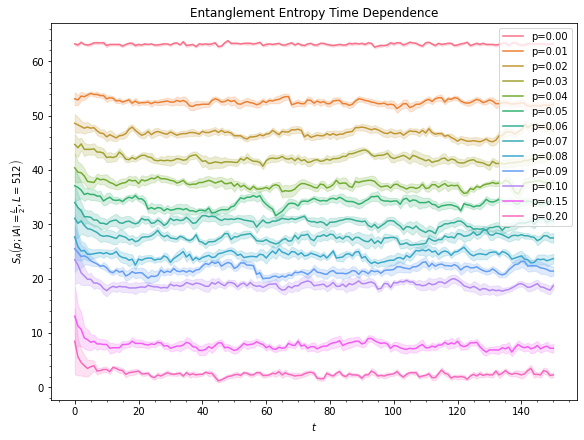

In [29]:
colors = sns.color_palette("husl", len(ps))

plt.subplots(figsize = (8, 6), layout = "constrained")

t = np.arange(depth + 1)

for i, p in enumerate(ps):
    plt.plot(t, entropies_zero[p][0], label="p={:.2f}".format(p), color=colors[i])
    plt.fill_between(t, entropies_zero[p][0]-entropies_zero[p][1], entropies_zero[p][0]+entropies_zero[p][1], alpha=0.2, color=colors[i])
    # plt.plot(t, entropies_random[p][0], color=colors[i])
    # plt.fill_between(t, entropies_random[p][0]-entropies_random[p][1], entropies_random[p][0]+entropies_random[p][1], alpha=0.2, color=colors[i])

plt.xlabel(r"$t$")
plt.ylabel(r"$S_A\left(p;\left|A\right|=\frac{L}{2},L=512\right)$")
plt.legend()
plt.title("Entanglement Entropy Time Dependence")
plt.legend(loc = "upper right")
# plt.xlim(-25, 1050)
# plt.ylim(-5, 270)
plt.minorticks_on()

Evolving entropies for p = 0.02:


  1%|▊                                                                                 | 1/100 [01:40<2:46:37, 100.98s/it]


KeyboardInterrupt: 

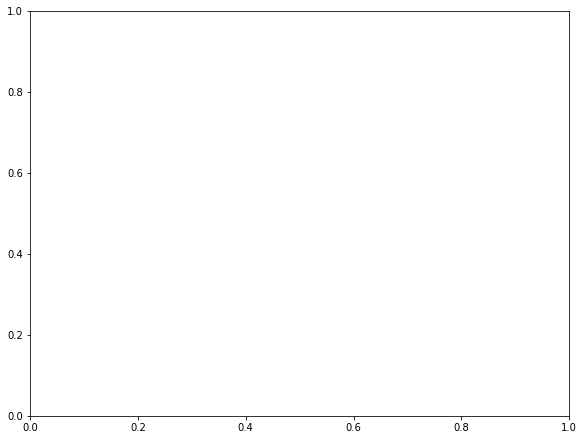

In [2]:
n_qubits = 512 # 10 ps * 100 shots * 80 seconds = 8000 seconds = 2.2 hours
depth = 256
shots = 100

ps = np.array([0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20])
colors = sns.color_palette("tab10")

plt.subplots(figsize = (8, 6), layout = "constrained")
x = np.arange(0, 250, 0.1)

for i, p in enumerate(ps):
    print("Evolving entropies for p = {}:".format(p))
    entropies = []
    for _ in tqdm(range(shots)):
        circ = create_circuit(n_qubits, depth, p)
        state = pc.zero_state(n_qubits)
        state = circ.forward(state)
        entropies.append(entropy(state))
    entropies = np.array(entropies)
    plt.hist(entropies, bins=20, color=colors[i], alpha=0.5, density = True)
    plt.plot(x, norm.pdf(x, *norm.fit(entropies)), color=colors[i], label="p={}".format(p))
plt.legend(loc = "right")
# plt.xlim(-5, 265)
# plt.ylim(0, 0.345)
plt.minorticks_on()
plt.grid(linestyle = ":")
plt.ylabel("Normalized Frequency")
plt.xlabel(r"$S_A$ ($p$;$\left|A\right|=L/2$, $L=512$)")
plt.title("Saturated Entanglement Entropy Distribution")